In [1]:

% pylab inline
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



Populating the interactive namespace from numpy and matplotlib


In [2]:
housing=pd.read_csv('housing.csv')

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [5]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [6]:
le = LabelEncoder()

In [7]:
housing['ocean_proximity'] = le.fit_transform(housing['ocean_proximity'])

In [8]:
X = housing.drop('median_house_value', axis=1)
y = housing.median_house_value

In [9]:
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())

In [10]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
housing.ocean_proximity.value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

In [12]:


from sklearn.preprocessing import LabelEncoder
cat_var =housing.dtypes.loc[housing.dtypes == 'object'].index
le =LabelEncoder()
for var in cat_var:
    housing[var] = le.fit_transform(housing[var])


In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [14]:
from sklearn import model_selection
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
lin = LinearRegression()

In [16]:
lin.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
ypredicted=lin.predict(xtrain)

In [18]:
rmse=(sqrt(mean_squared_error(ytrain,ypredicted)))
r2=r2_score(ytrain,ypredicted)

In [19]:
print('root mean squared error: ',rmse)
print('R2 score: ',r2)

root mean squared error:  69361.0714290645
R2 score:  0.6401079709888613


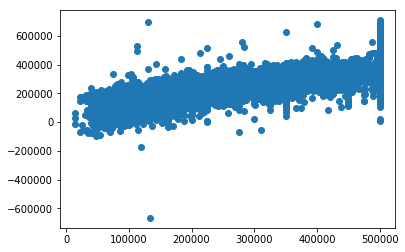

In [20]:
plt.scatter(ytrain,ypredicted)

In [21]:
dropcol=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','ocean_proximity']
print(dropcol)
train_med=X.drop(dropcol,axis=1)
print(type(train_med))


['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'ocean_proximity']
<class 'pandas.core.frame.DataFrame'>


In [22]:
xtrain1,xtest1,ytrain1,ytest1 = model_selection.train_test_split(train_med,y,test_size=0.2,random_state=42)

In [23]:
lin1=LinearRegression()
lin1.fit(xtrain1,ytrain1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
xtrain1.shape,xtrain1.size


((16512, 1), 16512)

In [25]:
ypred2=lin1.predict(xtest1)
print(len(ypred2))
print(len(ytest1))
print(ypred2[0:5])
print(ytest1[0:5])

4128
4128
[114958.91676996 150606.88213964 190393.71844449 285059.38345102
 200663.31816103]
20046     47700
3024      45800
15663    500001
20484    218600
9814     278000
Name: median_house_value, dtype: int64


Text(0,0.5,'median_house_value')

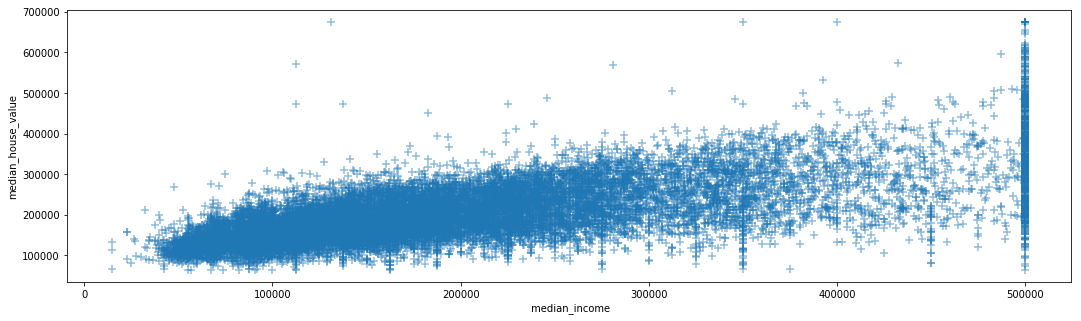

In [26]:
fig=figure(figsize=(18,5))
plt.scatter(ytrain1,lin1.predict(xtrain1),marker="+",s=50,alpha=0.5)
plt.xlabel(" median_income")
plt.ylabel("median_house_value")


Text(0,0.5,'median_house_value')

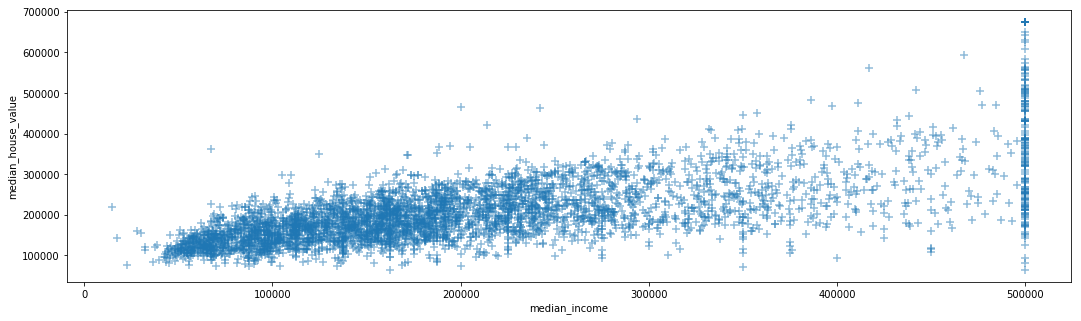

In [27]:
fig=figure(figsize=(18,5))
plt.scatter(ytest1,lin1.predict(xtest1),marker="+",s=50,alpha=0.5)
plt.xlabel("median_income")
plt.ylabel("median_house_value")



Text(0,0.5,'predicted median_house_value')

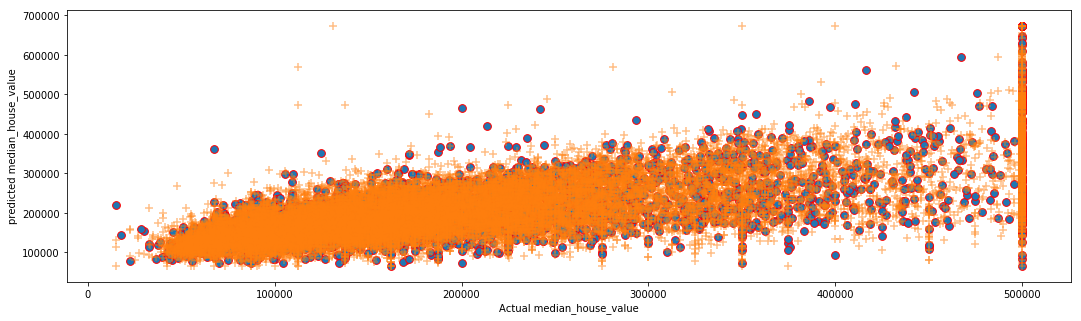

In [28]:
fig=figure(figsize=(18,5))
plt.scatter(ytest1,ypred2,marker="o",edgecolors="r",s=60)
plt.scatter(ytrain1,lin1.predict(xtrain1),marker="+",s=50,alpha=0.5)
plt.xlabel("Actual median_house_value")
plt.ylabel("predicted median_house_value")



In [29]:
depv = 'median_house_value'
indepv = [x for x in housing.columns if x not in ['ID',depv]]

In [30]:
housing[depv]

0        452600
1        358500
2        352100
3        341300
4        342200
5        269700
6        299200
7        241400
8        226700
9        261100
10       281500
11       241800
12       213500
13       191300
14       159200
15       140000
16       152500
17       155500
18       158700
19       162900
20       147500
21       159800
22       113900
23        99700
24       132600
25       107500
26        93800
27       105500
28       108900
29       132000
          ...  
20610     45500
20611     47000
20612     48300
20613     53400
20614     58000
20615     57500
20616     55100
20617     70800
20618     63400
20619     99100
20620    100000
20621     77500
20622     67000
20623     65500
20624     87200
20625     72000
20626     93800
20627    162500
20628     92400
20629    108300
20630    112000
20631    107200
20632    115600
20633     98300
20634    116800
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value

In [31]:
housing[indepv].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [32]:
dtree_reg = DecisionTreeRegressor(max_depth=10)

In [33]:
dtree_reg.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
ypredicted=dtree_reg.predict(xtrain)

In [35]:
rmse =(sqrt(mean_squared_error(ytrain, ypredicted)))
r2 = r2_score(ytrain, ypredicted)

In [36]:
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Root mean squared error:  45622.019921404506
R2 score:  0.8442996240249245


In [37]:
rforest_reg= RandomForestRegressor(max_depth=10)

In [38]:
rforest_reg.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
ypredicted = rforest_reg.predict(xtrain)


In [40]:
rmse = (sqrt(mean_squared_error(ytrain, ypredicted)))
r2 = r2_score(ytrain, ypredicted)


In [41]:
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)






Root mean squared error:  42845.58582505315
R2 score:  0.8626739867165664
